In [99]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('SampleSuperstore.csv')

# Dataset Sample

In [101]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Basic information and statistical insight

In [102]:
df.shape

(9994, 13)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [104]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [105]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Since we do not have any null values in our dataset we can proceed to Data Visualisation:

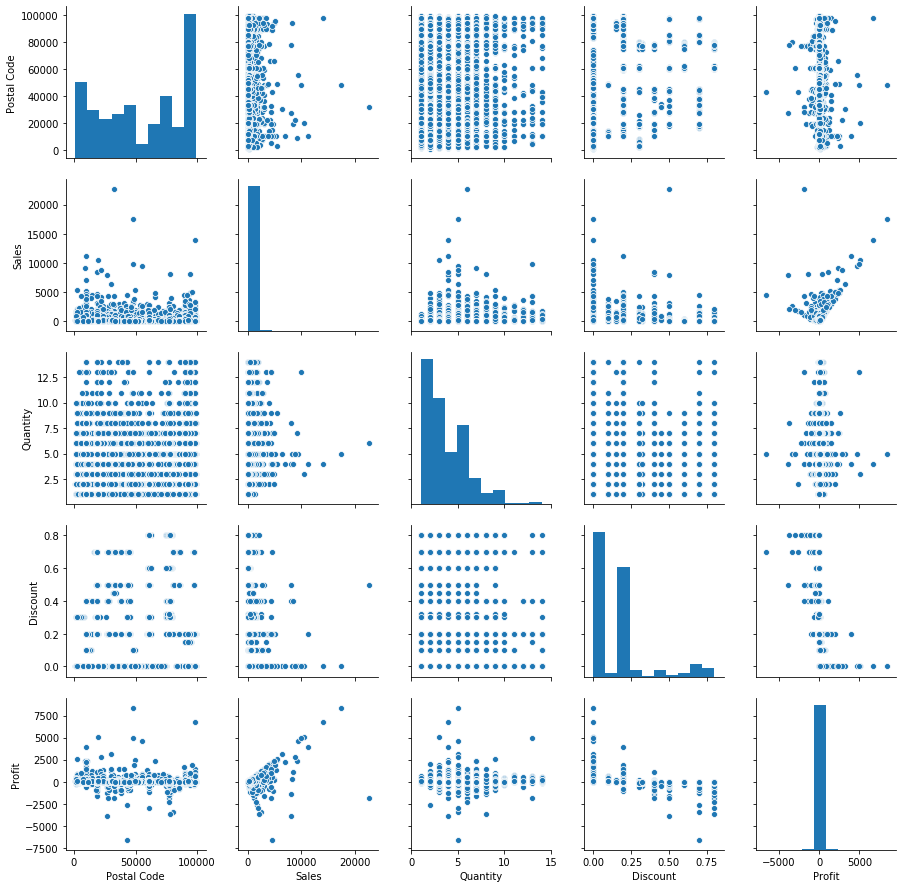

In [106]:
sb.pairplot(df)

### Heat map showing correlation between different entities

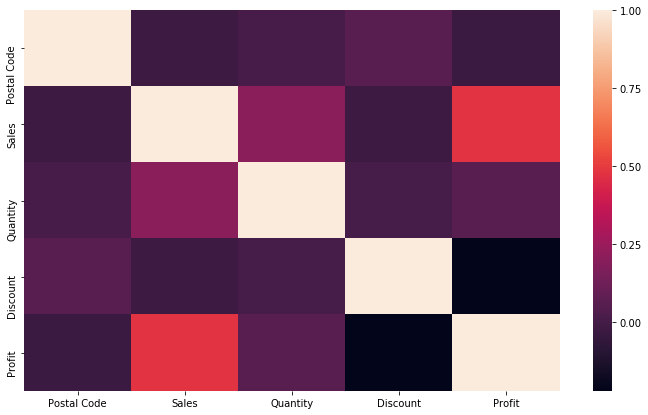

In [107]:
fig,axes = plt.subplots(1,1,figsize=(12,7))
sb.heatmap(df.corr())
plt.show()

### Profit vs Quantity plot for understanding the profit trends

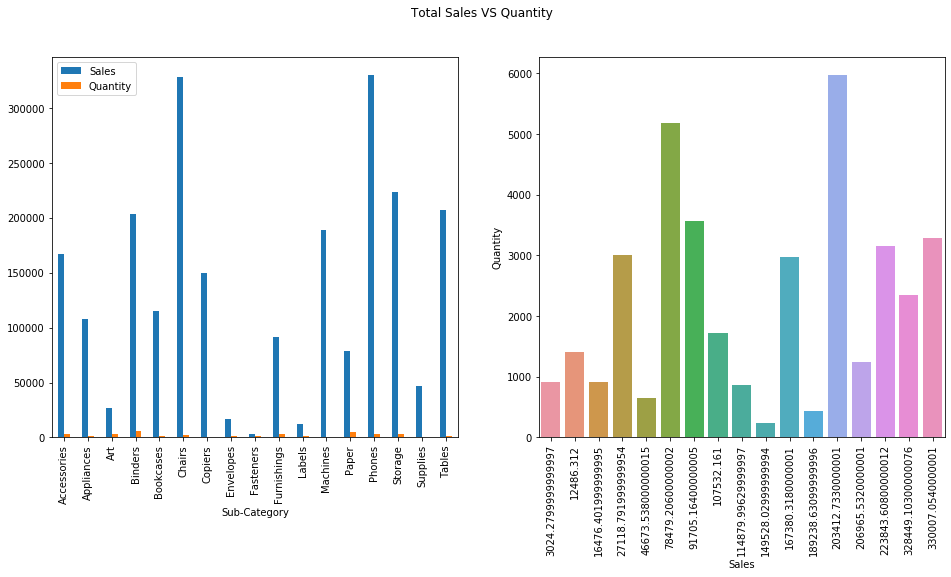

In [108]:
fig,axes = plt.subplots(1,2,figsize=(16,7))
fig.suptitle("Total Sales VS Quantity ")
sb.barplot(data=df.groupby('Sub-Category')['Sales','Quantity'].agg(sum),x='Sales',y='Quantity',ax=axes[1])
df.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

### Profit vs Sales plot for understanding the profit trends

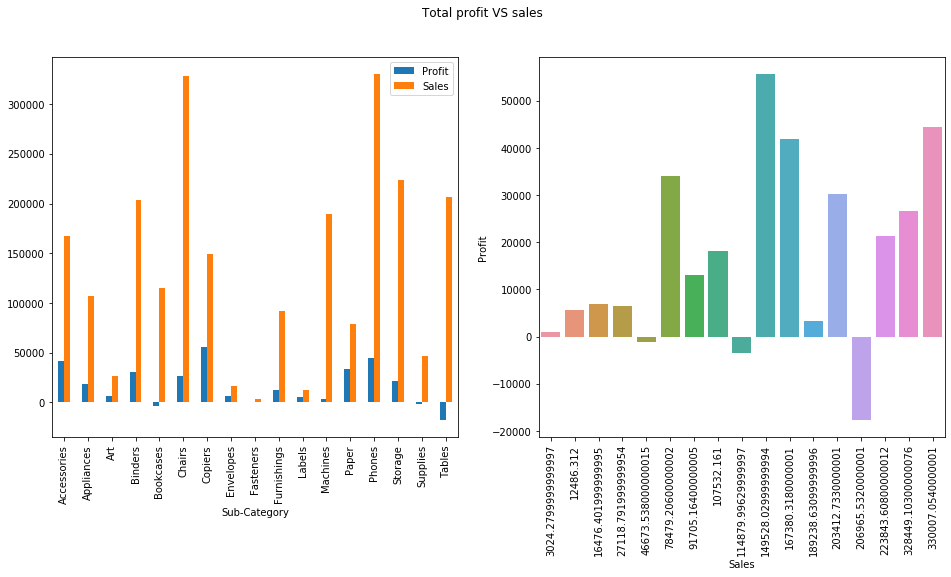

In [109]:
fig,axes = plt.subplots(1,2,figsize=(16,7))
fig.suptitle("Total profit VS sales ")
sb.barplot(data=df.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
df.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

### Discount , Profit and Quantity realtion plots

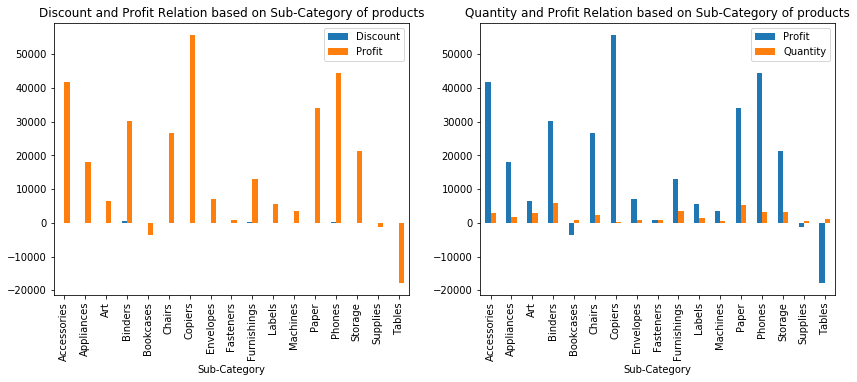

In [110]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
df.groupby('Sub-Category')['Discount','Profit'].agg(sum).plot(kind='bar',ax=axes[0]).set_title('Discount and Profit Relation based on Sub-Category of products')
df.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar',ax=axes[1]).set_title('Quantity and Profit Relation based on Sub-Category of products')
plt.xticks(rotation=90)
plt.show()

### Distribution plots

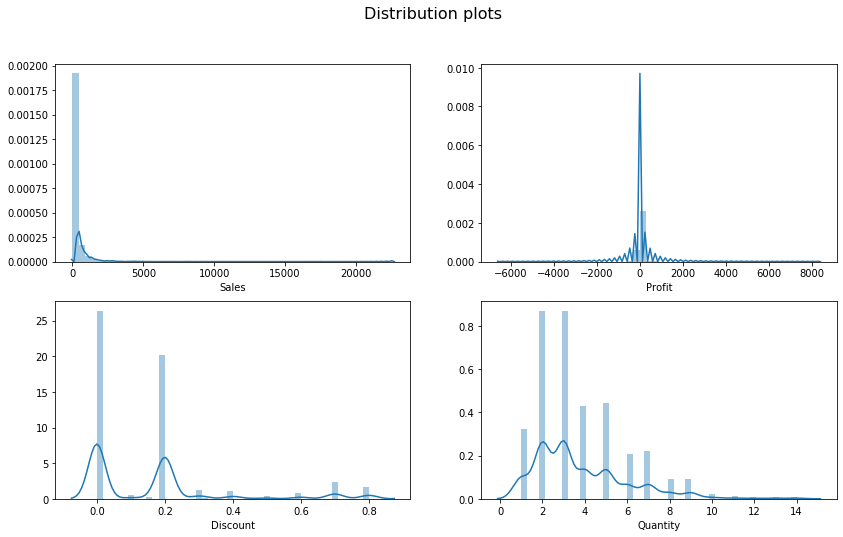

In [111]:
fig,axes = plt.subplots(2,2,figsize=(14,8))
fig.suptitle("Distribution plots", fontsize=16)
sb.distplot(df['Sales'],ax=axes[0,0])
sb.distplot(df['Profit'],ax=axes[0,1])
sb.distplot(df['Discount'],ax=axes[1,0])
sb.distplot(df['Quantity'],ax=axes[1,1])
plt.show()

### Sales plot with different shipping modes & Segments

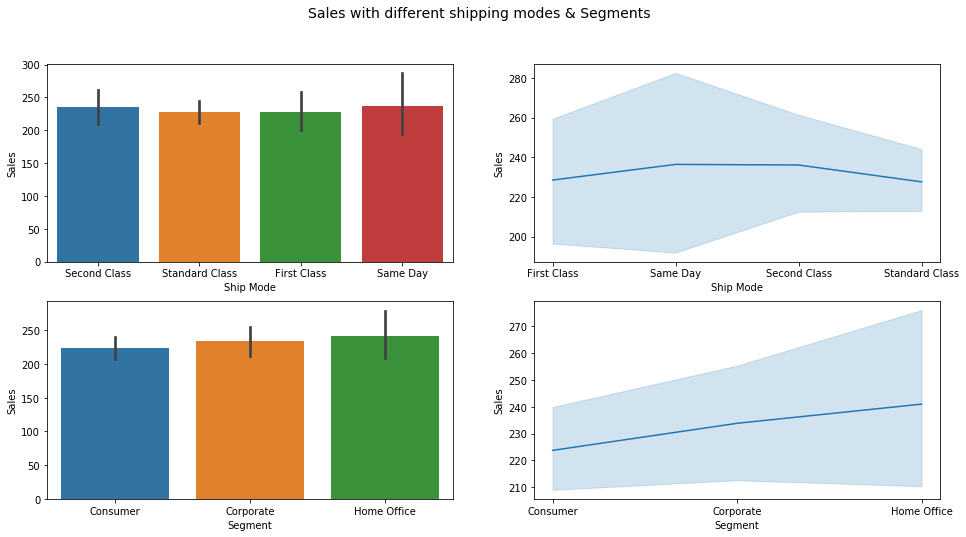

In [112]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Sales with different shipping modes & Segments", fontsize=14)
sb.barplot(df['Ship Mode'],df['Sales'],ax=axes[0,0])
sb.lineplot(df['Ship Mode'],df['Sales'],ax=axes[0,1])
sb.barplot(df['Segment'],df['Sales'],ax=axes[1,0])
sb.lineplot(df['Segment'],df['Sales'],ax=axes[1,1])
plt.show()

### Region wise quantity count plot

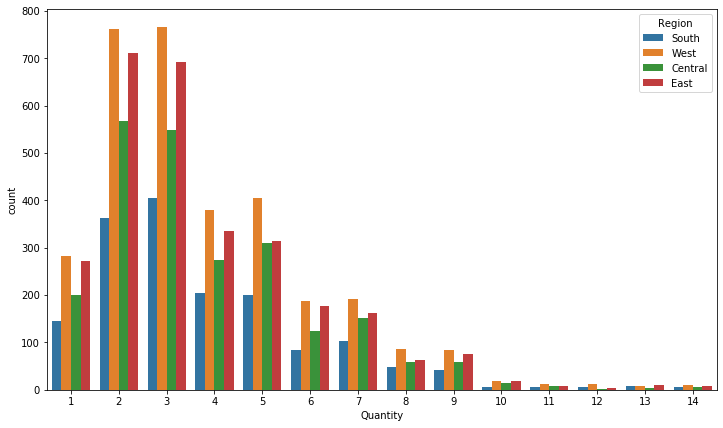

In [113]:
fig,ax= plt.subplots(1,1,figsize=(12,7))
sb.countplot(df['Quantity'],hue=df['Region'])
plt.show()

## Important insights from the Sample Store data

1. Profit and discount are highly relational, as we give discount by business strategies, by securing the profit, sales increases and we have more profit.
2. We can have more profit by giving the customers lucarative discount by precalculating the margin.
3. Mode of shipping does not affect sales too much, hence mode of shipping can depend on the ease of supplier.
4. The sub-category of copiers is giving highest profit and sub-category of tables is in most loss/
5. Most quantity orederd is between 2 to 4.